In [226]:
import pandas as pd
import numpy as np
import spotipy 
import os
import json
import seaborn as sns

from matplotlib import pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

In [198]:
client_id = os.environ["SPOTIPY_CLIENT_ID"]
client_secret = os.environ["SPOTIPY_CLIENT_SECRET"]
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

In [199]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [200]:
class Dataset:
    def __init__(self, name):
        self.name = name
        self.features = []
        self.tracks = []

In [201]:
indie = Dataset(name="IndieNesia")
rossa = Dataset(name="Rossa - Yang Terpilih")

## Read Artists' and Songs' Name

In [202]:
with open("data/indie_tracks.json", mode="r") as f:
    indie.tracks = json.load(f)

with open("data/rossa_tracks.json", mode="r") as f:
    rossa.tracks = json.load(f)

In [203]:
tracks_list = []

for track in indie.tracks['tracks']['items']:
    track_to_insert = {}
    track_to_insert["artist_name"] = track["track"]['artists'][0]['name']
    track_to_insert["track_name"] = track["track"]['name']
    track_to_insert["uri"] = track["track"]['uri']
    tracks_list.append(track_to_insert)
    
indie.df_tracks = pd.DataFrame(tracks_list)

In [204]:
tracks_list = []

for track in rossa.tracks['tracks']['items']:
    track_to_insert = {}
    track_to_insert["artist_name"] = track['artists'][0]['name']
    track_to_insert["track_name"] = track['name']
    track_to_insert["uri"] = track['uri']
    tracks_list.append(track_to_insert)
    
rossa.df_tracks = pd.DataFrame(tracks_list)

## Read Audio Features

In [205]:
with open("data/indie_audio_features.json", mode="r") as f:
    indie.features = json.load(f)

with open("data/rossa_audio_features.json", mode="r") as f:
    rossa.features = json.load(f)

In [206]:
features_columns_to_drop = ["id", "track_href", "analysis_url", "type"]

In [207]:
indie.df_features = pd.DataFrame(indie.features).drop(columns=features_columns_to_drop)
indie.df_features.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'uri', 'valence'],
      dtype='object')

In [208]:
rossa.df_features = pd.DataFrame(rossa.features).drop(columns=features_columns_to_drop)
rossa.df_features.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'uri', 'valence'],
      dtype='object')

## Merge Tracks and Features

In [209]:
indie.df = indie.df_tracks.merge(right=indie.df_features, how="inner", on="uri")
rossa.df = rossa.df_tracks.merge(right=rossa.df_features, how="inner", on="uri")

In [210]:
indie.df.head()

,artist_name,track_name,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Banda Neira,Sampai Jadi Debu (Menampilkan Gardika Gigih),spotify:track:0ROj512WvJ1eqeELd7MEdJ,0.9850,0.412,408288,0.108,0.070900,2,0.0836,-18.295,1,0.0484,97.448,4,0.141
1,Aya Anjani,Meredam,spotify:track:0WY2cPYu4Vpdl1ZwFvYs0n,0.6960,0.527,194873,0.485,0.020700,8,0.1090,-8.174,1,0.0442,190.002,4,0.436
2,Petra Sihombing,Biji,spotify:track:4EFPLSlS4BXNUFTaxeKOb9,0.6180,0.727,184833,0.475,0.013600,5,0.3010,-8.926,1,0.0282,85.003,4,0.748
3,Hindia,Apapun Yang Terjadi,spotify:track:0Z249BwDLHqBjed3GkVJos,0.0419,0.785,229000,0.481,0.000467,0,0.1360,-7.540,1,0.0315,93.998,4,0.689
4,Sisitipsi,Alkohol,spotify:track:0j6kSxICIu1wV9jNyS0qsn,0.2920,0.667,262400,0.540,0.000501,1,0.1080,-9.265,0,0.0333,110.001,4,0.412


In [211]:
rossa.df.head()

,artist_name,track_name,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Rossa,Terlalu Cinta,spotify:track:6I9rJKR6WPRir6XoAaaJvH,0.815,0.400,248133,0.406,0.000002,8,0.108,-5.668,1,0.0350,118.892,3,0.377
1,Rossa,Atas Nama Cinta,spotify:track:5vkmkOfrrAGHbGZp2WMDu6,0.866,0.352,243493,0.399,0.000006,4,0.107,-7.066,1,0.0288,90.681,4,0.141
2,Rossa,Tak Termiliki,spotify:track:14s50BeRDUrEYaHElq8fFT,0.734,0.540,215413,0.391,0.000089,9,0.309,-7.377,1,0.0262,109.810,4,0.289
3,Rossa,Pudar - New Version,spotify:track:6vNafdjmcePQb2j5A6JmM5,0.627,0.629,191773,0.872,0.000003,7,0.238,-3.984,1,0.0640,139.982,4,0.865
4,Rossa,Perawan Cinta,spotify:track:2qqVQGorWfFkp9lM9jA7w0,0.777,0.543,248347,0.447,0.000318,2,0.143,-7.815,0,0.0268,76.921,4,0.268


## Visualisation

IndieNesia std: 0.33801716387232217
Rossa - Yang Terpilih std: 0.20979194017708427


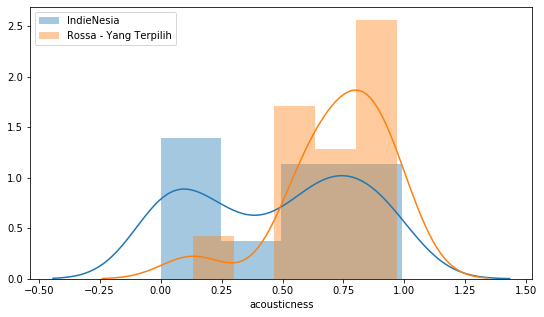

In [236]:
plt.subplots(figsize=(9, 5))
sns.distplot(a=indie.df["acousticness"], label=indie.name)
sns.distplot(a=rossa.df["acousticness"], label=rossa.name)
plt.legend()

print("IndieNesia std: {}".format(np.std(indie.df["acousticness"])))
print("Rossa - Yang Terpilih std: {}".format(np.std(rossa.df["acousticness"])))

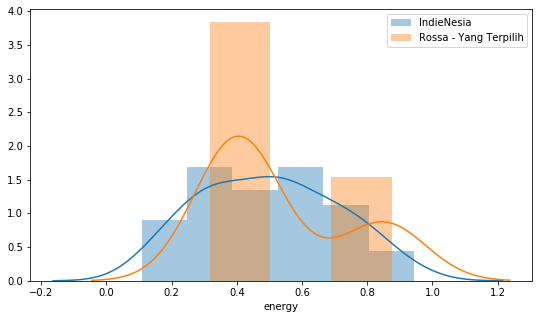

In [222]:
plt.subplots(figsize=(9, 5))
sns.distplot(a=indie.df["energy"], label=indie.name)
sns.distplot(a=rossa.df["energy"], label=rossa.name)
plt.legend()

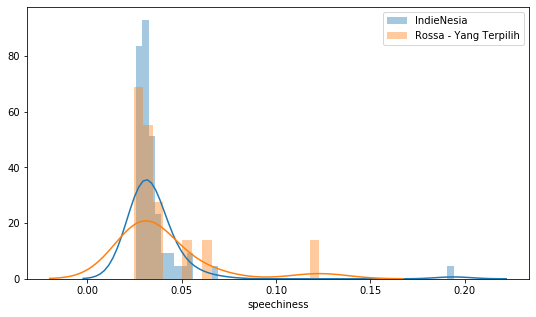

In [223]:
plt.subplots(figsize=(9, 5))
sns.distplot(a=indie.df["speechiness"], label=indie.name)
sns.distplot(a=rossa.df["speechiness"], label=rossa.name)
plt.legend()

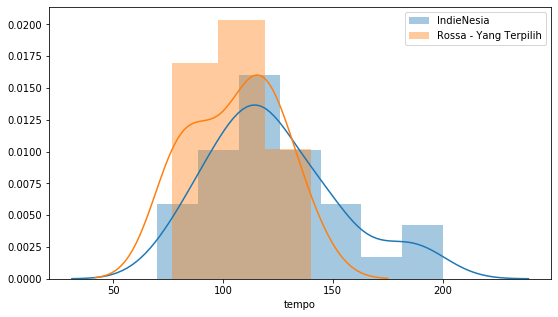

In [224]:
plt.subplots(figsize=(9, 5))
sns.distplot(a=indie.df["tempo"], label=indie.name)
sns.distplot(a=rossa.df["tempo"], label=rossa.name)
plt.legend()

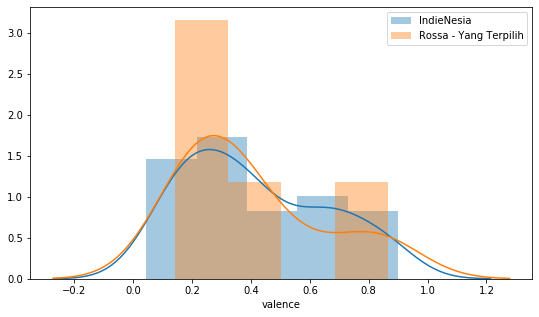

In [225]:
plt.subplots(figsize=(9, 5))
sns.distplot(a=indie.df["valence"], label=indie.name)
sns.distplot(a=rossa.df["valence"], label=rossa.name)
plt.legend()